In [1]:
import random
import os
import cv2
import torch
from matplotlib import pyplot as plt

import albumentations as A
from albumentations import  HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, \
    RandomRotate90, Transpose, ShiftScaleRotate, Blur, CenterCrop, RandomCrop, \
    OpticalDistortion, GridDistortion, HueSaturationValue, \
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, \
    IAAPiecewiseAffine, IAASharpen, IAAEmboss, RandomContrast, GaussianBlur,\
    RandomBrightness, Flip, OneOf, VerticalFlip, Resize, Rotate, Compose,RandomBrightnessContrast,RGBShift,Cutout,CoarseDropout


In [2]:

def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18

    # plt绘图 RGB 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(1, 2, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        original_mask = cv2.cvtColor(original_mask, cv2.COLOR_BGR2RGB)

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)


c:\ProgramData\Anaconda3\envs\py388\lib\site-packages\albumentations\augmentations\transforms.py:1613: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
c:\ProgramData\Anaconda3\envs\py388\lib\site-packages\albumentations\augmentations\transforms.py:1765: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(


IMG_AUG\JPEGImages_AUG_image\RbRGB_pitaya_HFlip_000002.jpg
IMG_AUG\JPEGImages_AUG_image\RbRGB_pitaya_Ver_000002.jpg
IMG_AUG\JPEGImages_AUG_image\RbRGB_pitaya_RBri_000002.jpg
IMG_AUG\JPEGImages_AUG_image\RbRGB_pitaya_GBlur_000002.jpg


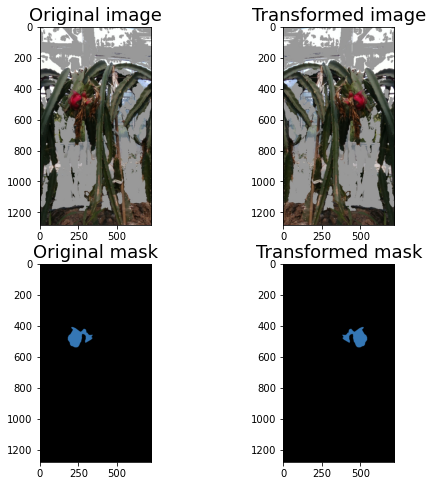

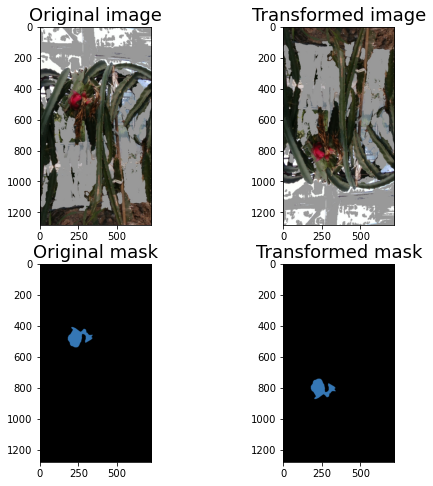

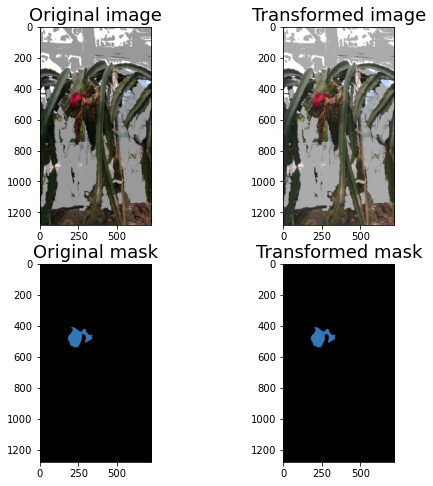

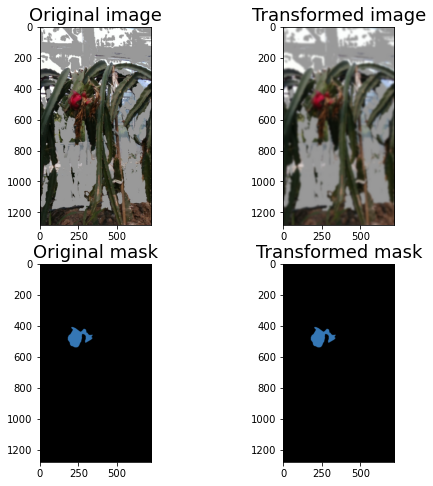

In [3]:
# 用于调试
# 单张 = 测试 =可视化

Ori_jpgPath = 'JPEGImages'  +  '_X1_1370'   
Ori_maskpngPath = 'SegmentationClass' + '_pseudo_1370'  
Imgname_prefix = 'RbRGB_pitaya_' 


# 保存=主路径  
img_aug_save_dir = 'IMG_AUG\JPEGImages_AUG_image' 
mask_aug_save_dir = 'IMG_AUG\SegmentationClass_AUG_mask' 

for i_path in [img_aug_save_dir,mask_aug_save_dir]:
    if not os.path.exists(i_path):
        os.makedirs(i_path)

num_img = 2

# 获得训练图像的编号
with open('ImageSets\Segmentation\origintrain.txt','r') as f:
    train_lines = f.readlines()
imgtrain_num_list = []
for i_num in range(len(train_lines)):
    imgtrain_num_list.append(int(train_lines[i_num][-7:-1]))
# imgtrain_num_list


# 读取原始图像 + mask  
image = cv2.imread(os.path.join(Ori_jpgPath, Imgname_prefix + str(num_img).zfill(6) + '.jpg'))
mask = cv2.imread(os.path.join(Ori_maskpngPath, Imgname_prefix + str(num_img).zfill(6) + '.png'))  # cv2.IMREAD_GRAYSCALE

# 保存 == 原始图片与mask = 到 = 主路径   
cv2.imwrite(os.path.join(img_aug_save_dir, Imgname_prefix + str(num_img).zfill(6) + '.jpg'), image, [cv2.IMWRITE_JPEG_QUALITY,95])  
cv2.imwrite(os.path.join(mask_aug_save_dir, Imgname_prefix + str(num_img).zfill(6) + '.png'), mask, [int(cv2.IMWRITE_PNG_COMPRESSION), 1]) 

# 数据增强函数 = 定义  
aug_HFlip = A.HorizontalFlip(p = 1)   # HorizontalFlip  水平翻转 
aug_Ver   = A.VerticalFlip(p = 1)     # 垂直方向翻转 
aug_RBri  = A.RandomBrightness(limit=0.2, always_apply=True, p=1) 
aug_GBlur = A.GaussianBlur(blur_limit=45, always_apply=True, p=1) 

# 数据增强函数 / 前缀 = 列表  
aug_name_list = [aug_HFlip, aug_Ver, aug_RBri, aug_GBlur ] 
aug_namestr_list = ['HFlip_', 'Ver_', 'RBri_', 'GBlur_'  ]    

for i_num in range(len(aug_name_list)): 
    aug = aug_name_list[i_num] 
    aug_namestr = aug_namestr_list[i_num] 

    # 数据增强 = 关键操作
    augmented = aug(image=image, mask=mask) 

    # 可视化 == 批量必须关闭可视化 == 否则会死机
    image_h_flipped = augmented['image']
    mask_h_flipped = augmented['mask']
    visualize(image_h_flipped, mask_h_flipped, original_image=image, original_mask=mask)
    print(os.path.join(img_aug_save_dir, Imgname_prefix + aug_namestr + str(num_img).zfill(6) + '.jpg'))

    # 保存 = 数据增强后的图片与mask
    cv2.imwrite(os.path.join(img_aug_save_dir, Imgname_prefix + aug_namestr + str(num_img).zfill(6) + '.jpg'), 
                    augmented['image'], [cv2.IMWRITE_JPEG_QUALITY,95])  

    cv2.imwrite(os.path.join(mask_aug_save_dir, Imgname_prefix + aug_namestr + str(num_img).zfill(6) + '.png'), 
                    augmented['mask'],  [int(cv2.IMWRITE_PNG_COMPRESSION), 1]) 
    

In [4]:
import tqdm
# 批量处理 = 不允许可视化 
Ori_jpgPath = 'JPEGImages'  +  '_X1_1370'   
Ori_maskpngPath = 'SegmentationClass' + '_pseudo_1370' 
Imgname_prefix = 'RbRGB_pitaya_' 


# 保存=主路径  
img_aug_save_dir = 'IMG_AUG\JPEGImages_AUG_image' 
mask_aug_save_dir = 'IMG_AUG\SegmentationClass_AUG_mask' 

for i_path in [img_aug_save_dir,mask_aug_save_dir]:
    if not os.path.exists(i_path):
        os.makedirs(i_path)

# 获得训练图像的编号
with open('ImageSets\Segmentation\origintrain.txt','r') as f:
    train_lines = f.readlines()
imgtrain_num_list = []
for i_num in range(len(train_lines)):
    imgtrain_num_list.append(int(train_lines[i_num][-7:-1]))
# imgtrain_num_list

# 批量处理 
for num_img in imgtrain_num_list:
    
    # 读取原始图像 + mask  
    image = cv2.imread(os.path.join(Ori_jpgPath, Imgname_prefix + str(num_img).zfill(6) + '.jpg'))
    mask = cv2.imread(os.path.join(Ori_maskpngPath, Imgname_prefix + str(num_img).zfill(6) + '.png'))  # cv2.IMREAD_GRAYSCALE

    # 保存 == 原始图片与mask = 到 = 主路径   
    cv2.imwrite(os.path.join(img_aug_save_dir, Imgname_prefix + str(num_img).zfill(6) + '.jpg'), image, [cv2.IMWRITE_JPEG_QUALITY,95])  
    cv2.imwrite(os.path.join(mask_aug_save_dir, Imgname_prefix + str(num_img).zfill(6) + '.png'), mask, [int(cv2.IMWRITE_PNG_COMPRESSION), 1]) 

    # 数据增强函数 = 定义  
    aug_HFlip = A.HorizontalFlip(p = 1)   # HorizontalFlip  水平翻转 
    aug_Ver   = A.VerticalFlip(p = 1)     # 垂直方向翻转 
    aug_RBri  = A.RandomBrightness(limit=0.2, always_apply=True, p=1) 
    aug_GBlur = A.GaussianBlur(blur_limit=45, always_apply=True, p=1) 

    # 数据增强函数 / 前缀 = 列表  
    aug_name_list = [aug_HFlip, aug_Ver, aug_RBri, aug_GBlur ] 
    aug_namestr_list = ['HFlip_', 'Ver_', 'RBri_', 'GBlur_'  ]    

    for i_num in range(len(aug_name_list)): 
        aug = aug_name_list[i_num] 
        aug_namestr = aug_namestr_list[i_num] 

        # 数据增强 = 关键操作
        augmented = aug(image=image, mask=mask) 

        # # 可视化 == 批量必须关闭可视化 == 否则会死机
        # image_h_flipped = augmented['image']
        # mask_h_flipped = augmented['mask']
        # visualize(image_h_flipped, mask_h_flipped, original_image=image, original_mask=mask)
        # print(os.path.join(img_aug_save_dir, Imgname_prefix + aug_namestr + str(num_img).zfill(6) + '.jpg'))

        # 保存 = 数据增强后的图片与mask
        cv2.imwrite(os.path.join(img_aug_save_dir, Imgname_prefix + aug_namestr + str(num_img).zfill(6) + '.jpg'), 
                        augmented['image'], [cv2.IMWRITE_JPEG_QUALITY,95])  

        cv2.imwrite(os.path.join(mask_aug_save_dir, Imgname_prefix + aug_namestr + str(num_img).zfill(6) + '.png'), 
                        augmented['mask'],  [int(cv2.IMWRITE_PNG_COMPRESSION), 1]) 
        

In [5]:
import shutil
# 移动val图像，到增强后的数据集中==归集到一起
# 保存=主路径  
img_aug_save_dir = 'IMG_AUG\JPEGImages_AUG_image' 
mask_aug_save_dir = 'IMG_AUG\SegmentationClass_AUG_mask' 
for i_path in [img_aug_save_dir,mask_aug_save_dir]:
    if not os.path.exists(i_path):
        os.makedirs(i_path)

# 原始=主路径 
Ori_jpgPath = 'JPEGImages'  +  '_X1_1370'   
Ori_maskpngPath = 'SegmentationClass' + '_pseudo_1370' 
Imgname_prefix = 'RbRGB_pitaya_' 


# 获得训练图像的编号
with open('ImageSets\Segmentation\originval.txt','r') as f: 
    val_lines = f.readlines() 
imgval_num_list = [] 
for i_num in range(len(val_lines)): 
    imgval_num_list.append(int(val_lines[i_num][-7:-1]))  
print(len(imgval_num_list))  

for num_img in imgval_num_list: 
    # 原始路径 = 图片+mask 
    src_img = os.path.join(Ori_jpgPath, Imgname_prefix + str(num_img).zfill(6) + '.jpg') 
    src_mask = os.path.join(Ori_maskpngPath, Imgname_prefix + str(num_img).zfill(6) + '.png')  

    # 保存路径 = 图片+mask 
    dst_img = os.path.join(img_aug_save_dir, Imgname_prefix + str(num_img).zfill(6) + '.jpg') 
    dst_mask = os.path.join(mask_aug_save_dir, Imgname_prefix + str(num_img).zfill(6) + '.png') 

    # 复制操作 == 图片 + mask 
    shutil.copy(src_img, dst_img) 
    shutil.copy(src_mask, dst_mask) 


2


In [6]:
# 数据增强后，生成trian.txt
# 获得训练图像的编号
import glob
# 保存=主路径  
img_aug_save_dir = 'IMG_AUG\JPEGImages_AUG_image' 
mask_aug_save_dir = 'IMG_AUG\SegmentationClass_AUG_mask' 
Imgname_prefix = 'RbRGB_pitaya_' 

with open('ImageSets\Segmentation\origintrain.txt','r') as f:
    train_lines = f.readlines()
imgtrain_num_list = []
for i_num in range(len(train_lines)):
    imgtrain_num_list.append(int(train_lines[i_num][-7:-1]))


train_Aug_nameall =[]
for num_img in imgtrain_num_list:
    pres = glob.glob( os.path.join(mask_aug_save_dir, Imgname_prefix + '*' + str(num_img).zfill(6) + '.png') )

    for i_pres in (pres):
        i_pres_basename = os.path.basename(i_pres).split('.')[0] 
        train_Aug_nameall.append(i_pres_basename)
# print(train_Aug_nameall)

### ==== 写入txt ==== ###
saveBasePath=r"ImageSets\Segmentation" # 定义--数据增强后的traintxt--路径  
ftrain = open(os.path.join(saveBasePath, 'aug' +'train.txt'), 'w') 
for i in train_Aug_nameall:   
    name = i +'\n' 
    ftrain.write(name)   
ftrain.close()



In [7]:
if False:
    # 重命名文件夹
    # 保存=主路径  
    img_aug_save_dir = 'IMG_AUG\AUG_image' 
    mask_aug_save_dir = 'IMG_AUG\AUG_mask' 
    # 修改=主路径
    img_aug_dirdst = 'IMG_AUG\JPEGImages_AUG_image' 
    mask_aug_dirdst = 'IMG_AUG\SegmentationClass_AUG_mask' 
    os.rename(img_aug_save_dir, img_aug_dirdst)
    os.rename(mask_aug_save_dir,  mask_aug_dirdst)